In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Color space

Sử dụng hàm `cvtColor` để chuyển đổi giữa các không gian mã hóa màu sắc khác nhau

In [2]:
img = cv.imread("images/cards.jpg")
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) # chuyển đổi mã hóa BGR (mặc định của opencv) sang HSV

Xác định các vùng có màu *đỏ* có trong ảnh `cards.jpg` trên không gian HSV
* **H**: *(Hue)* vùng màu
* **S**: *(Saturation)* độ bão hòa màu (màu nhạt **S** thấp và ngược lại)
* **V**: *(Value)* hoặc *(Brightness)* độ sáng của màu

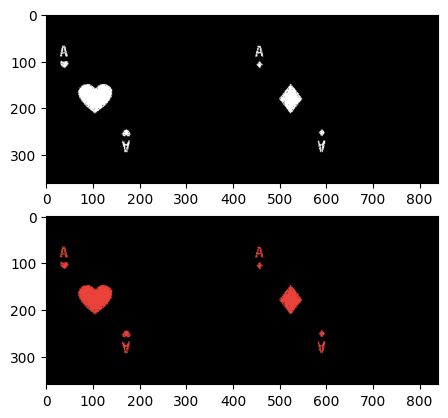

In [3]:
RED = np.uint8([[[0, 0, 255]]])
hsv_red = cv.cvtColor(RED, cv.COLOR_BGR2HSV)

# khoảng ứng với màu red trong không gian HSV
# công thức từ docs.opencv [H-10, 100, 100] -> [H+10, 255, 255]
H = hsv_red[0,0,0]
lower_red = np.array([H - 10, 100, 100])
upper_red = np.array([H + 10, 255, 255])

mask = cv.inRange(img_hsv, lower_red, upper_red) # các vị trí pixel ứng với màu đỏ
img_only_red = cv.bitwise_and(img, img, mask=mask) # Thực hiện phép AND của ảnh cards.jpg với chính nó tại các vị trí pixel màu đỏ
                                                   # những vị trí pixel khác trả về giá trị màu đen

plt.subplot(2, 1, 1)
plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 1, 2)
plt.imshow(cv.cvtColor(img_only_red, cv.COLOR_BGR2RGB), vmin=0, vmax=255)

## Geometric transformations

### Scaling

Thực hiện thông qua hàm `resize(src, Size, interpolation)` của OpenCV
* **src** - ảnh thực hiện phép scale
* **Size** - kích thước ảnh đầu ra, **_theo thứ tự trục x rồi đến trục y_** (độ rộng, chiều cao)
* **interpolation** - phương thức nội suy cho ảnh đầu ra, (INTER_LINEAR hoặc INTER_CUBIC đều tốt nhưng INTER_LINEAR nhanh hơn)

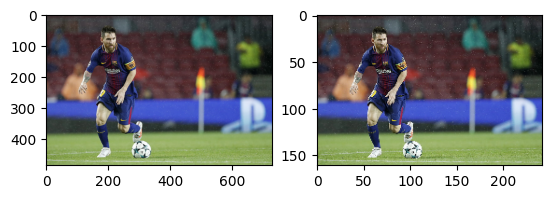

In [4]:
img = cv.imread('images/messi.jpg')
height, width = img.shape[:2]
scaled_img = cv.resize(img, (width//3, height//3), interpolation=cv.INTER_LINEAR)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(scaled_img, cv.COLOR_BGR2RGB))

### Affine transformation

Các phép biến đổi hình học thông thường được biểu diễn dưới dạng phép biến đổi affine. Phép biến đổi affine bảo tồn tính chất song song giữa các cặp đường thẳng. Phép biến đổi đó được biểu diễn dưới dạng ma trận của phép dịch và phép xoay $$M=\begin{bmatrix} s\mathbf{R} & \mathbf{t} \end{bmatrix}$$

* $s$ - hệ số scaling
* $\mathbf{R}$ - ma trận xoay $$\mathbf{R}=\begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}$$
* $\mathbf{t}$ - vector dịch $$\mathbf{t}=\begin{bmatrix} t_x \\ t_y \end{bmatrix}$$

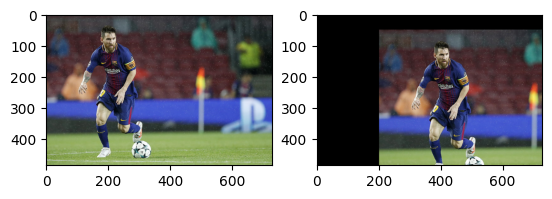

In [5]:
height, width = img.shape[:2]
M = np.float32([[1, 0, 200], 
                [0, 1, 50]]) # dịch ảnh theo trục x 100 đơn vị, trục y 50 đơn vị
dst = cv.warpAffine(img, M, (width, height)) # áp dụng phép biến đổi affine M

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

Hàm `getRotationMatrix2D(cx, cy, angle, scale)` trong OpenCV giúp tạo ra một ma trận biến đổi affine thực hiện phép quay quanh điểm `(cx, cy)` một góc `angle` (độ) ngược chiều kim đồng hồ

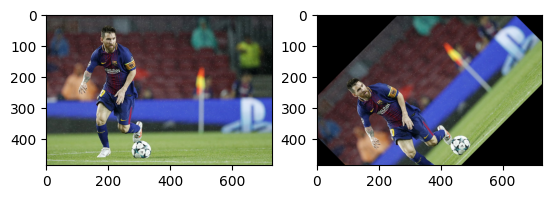

In [6]:
height, width = img.shape[:2]
M = cv.getRotationMatrix2D( (width / 2.0, height / 2.0), 45, 1 ) # quay ảnh quanh tâm chính giữa một góc 45 độ và giữ nguyên tỉ lệ
dst = cv.warpAffine(img, M, (width, height)) # thực hiện phép biến đổi affine M

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

Nếu biết một tập điểm $\mathcal{X}$ trước khi được biến đổi affine $M$ và tập $\mathcal{X'}$ sau khi biến đổi tương ứng. Sử dụng hàm `getAffineTransformation(pts1, pts2)` để xác định được ma trận $M$.

* `pts1` - các điểm trong tập $\mathcal{X}$
* `pts2` - các điểm trong tập $\mathcal{X'}$ tương ứng với `pts1`

Theo OpenCV docs để sử dụng hàm `getAffineTransformation` thì $|\mathcal{X}| = |\mathcal{X'}|$ và $|\mathcal{X}| \geq 3$

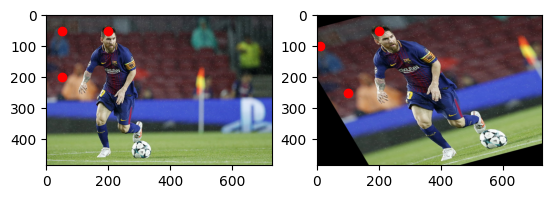

In [7]:
height, width = img.shape[:2]

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
 
M = cv.getAffineTransform(pts1,pts2)
 
dst = cv.warpAffine( img, M, (width, height) )

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.scatter(pts1[:,0], pts1[:,1], c='red')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.scatter(pts2[:,0], pts2[:,1], c='red')

## Perspective transformation

Phép biến đổi perspective là phép biến đổi tổng quát hơn, tuyến tính trên mặt phẳng ảnh. Phép biến đổi perspective bảo toàn tính thẳng hàng giữa các điểm trong không gian 2D. Phép biến đổi thực hiện thông qua ma trận $M$ kích thước $3 \times 3$. 

Tương tự với phép biến đổi affine, OpenCV cung cấp hàm `getPerspectiveTransform` để tìm ra ma trận biến đổi $M$ tương ứng với tập $\mathcal{X}$ và $\mathcal{X'}$. Kích thước tối thiểu của cả hai tập $\mathcal{X}$ và $\mathcal{X'}$ là $4$.

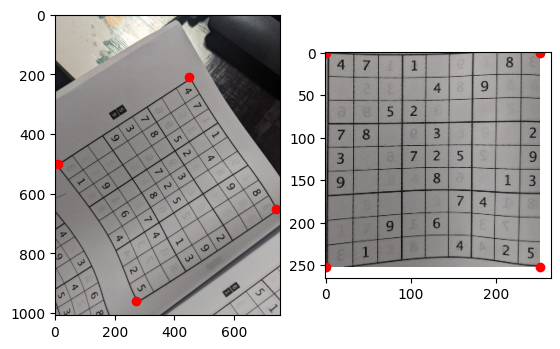

In [8]:
img = cv.imread('images/sudoku.jpg') # ảnh bảng sudoku
height, width = img.shape[:2]
img = cv.resize(img, (width//4, height//4)) # resize lại ảnh cho nhỏ
height, width = img.shape[:2]

pts1 = np.float32([[450, 210], 
                   [10, 500], 
                   [270, 960], 
                   [740, 650]]) # 4 góc của bảng sudoku

pts2 = np.float32([[0, 0], 
                   [0, 252], 
                   [252, 252], 
                   [252, 0]]) # Dịch 4 góc này về 4 góc của một ảnh kích thước 252x252

M = cv.getPerspectiveTransform(pts1, pts2)
dst = cv.warpPerspective(img, M, (252, 252))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.scatter(pts1[:,0], pts1[:,1], c='red')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.scatter(pts2[:,0], pts2[:,1], c='red')